# Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes' theorem with the "naive" assumption of conditional independence between every pair of features given the value of the class variable. Bayes'theorem states the following relationship, given class variable $y$ and dependent feature vector $x_1$ through $x_n$,:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$$

Using the naive conditional independence assumption, we have

$$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}$$

Then, we can use Maximum A Posteriori (MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class $y$ in the training set.

*References*:
H. Zhang (2004). The optimality of Naive Bayes. Proc. FLAIRS.

# 1 Gaussian Naive Bayes

[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) implements the Gaussian Naive Bayes algorithm for classification on the data sets where features are continuous.   
The likelihood of the features is assumed to be Gaussian:

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

The parameters $\sigma_y$ and $\mu_y$  are estimated using maximum likelihood.

#### Demo
In this demo, we show how to build a Gaussian Naive Bayes classifier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

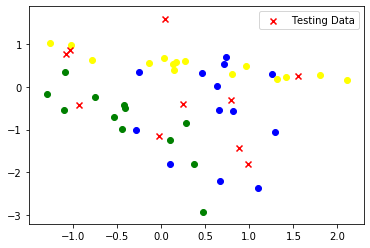

In [2]:
# Generate a synthetica 2D dataset
X, y = make_classification(n_samples=50, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1, 
                           weights=None, flip_y=0.01, class_sep=0.5, hypercube=True,
                           shift=0.0, scale=1.0, shuffle=True, random_state=42)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Visualize the generated data
colors = ['blue', 'yellow', 'green']
for i, color in enumerate(colors):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=color)
plt.scatter(X_test[:, 0], X_test[:,1], c='red', marker='x', label='Testing Data')
plt.legend(loc='best')
plt.show()

In [3]:
print(X.shape)
print(X)

(50, 2)
[[ 0.473217   -2.92751099]
 [-0.13251585  0.55279599]
 [ 0.10118627 -1.2450102 ]
 [ 0.74096317  0.70786564]
 [ 0.81518332 -0.56023023]
 [ 0.03812606  0.68954121]
 [ 0.13025593  0.53262881]
 [ 0.10383493 -1.81428474]
 [ 0.66454553 -2.20680262]
 [ 1.09794267 -2.37877725]
 [ 0.27749151 -0.854605  ]
 [-0.53316481 -0.70513853]
 [ 0.63757741  0.01213484]
 [ 0.04046135  1.59824301]
 [ 0.16893175  0.57777706]
 [ 1.79734745  0.28474816]
 [ 1.25902255  0.31331681]
 [ 0.24598286 -0.40419339]
 [ 0.80229983  0.30773135]
 [-1.07791165  0.7846769 ]
 [ 1.31042584  0.19436827]
 [-0.40911573 -0.49397966]
 [-0.24888401  0.35671172]
 [ 0.46062499  0.33753716]
 [ 0.37015937 -1.80675394]
 [-0.0209867  -1.14752199]
 [-0.93394919 -0.41554394]
 [-0.77955519  0.64076619]
 [ 0.65883537 -0.52938345]
 [ 2.10961578  0.16063375]
 [ 0.79821042 -0.30174085]
 [-1.26426797  1.04233134]
 [ 1.55499494  0.24637834]
 [-0.42413555 -0.4178452 ]
 [ 0.26824054  0.61720713]
 [-0.75096812 -0.22755654]
 [-0.44141363 -0.992

In [4]:
print(y.shape)
print(y)

(50,)
[2 1 2 0 0 1 1 0 0 0 2 2 0 0 1 1 0 2 1 1 1 2 0 0 2 2 2 1 0 1 0 1 1 2 1 2 2
 2 0 0 2 1 1 1 0 0 1 2 2 0]


In [6]:
# Create and training a Gaussian Naive Bayes classifier model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.8


In [7]:
# Explore the learned probability (model parameters)
print('Estimated probability of classess: \n', clf.class_prior_)
print('Estimated mean for each Gaussian distribution: \n', clf.theta_)
print('Estimated variance for each Gaussian distribution: \n', clf.sigma_)

Estimated probability of classess: 
 [0.325 0.375 0.3  ]
Estimated mean for each Gaussian distribution: 
 [[ 0.60903899 -0.56115715]
 [ 0.39670288  0.51301944]
 [-0.40161257 -0.83685934]]
Estimated variance for each Gaussian distribution: 
 [[0.23233913 1.0483911 ]
 [0.93521181 0.0662763 ]
 [0.3309853  0.6755908 ]]


For example, for Class 0 and the first feature, we can have the following Gaussian disribution

$$P(x_0 \mid Class=0) = \frac{1}{\sqrt{2\pi\cdot0.2323}} \exp\left(-\frac{(x_0 - 0.6090)^2}{2\cdot0.2323}\right)$$

In [8]:
# Use 10-fold cross validation to show a more robust prediction accuracy
from sklearn.model_selection import cross_val_score
clf = GaussianNB()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy: %.4f +- %.4f\n' % (scores.mean(), scores.std()))

Gaussian Naive Bayes accuracy: 0.7000 +- 0.1612



**Tasks** - The training data is generated as follows:

In [9]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

# Firstly, let's do the parameter estimation manually without using the model
X_0_C_1=X[y==1][:,0]
X_1_C_1=X[y==1][:,1]
X_0_C_2=X[y==2][:,0]
X_1_C_2=X[y==2][:,1]

manual_means = np.array([[X_0_C_1.mean(), X_1_C_1.mean()], [X_0_C_2.mean(), X_1_C_2.mean()]])
print('Means estaimated manually: \n', manual_means)
manual_vars = np.array([[X_0_C_1.var(), X_1_C_1.var()], [X_0_C_2.var(), X_1_C_2.var()]])
print('Variances estaimated manually: \n', manual_vars)

Means estaimated manually: 
 [[-2.         -1.33333333]
 [ 2.          1.33333333]]
Variances estaimated manually: 
 [[0.66666667 0.22222222]
 [0.66666667 0.22222222]]


**Q1**: Training a GaussianNB model and print out the learned model parameters (parameters of probability distributions). And check if the learned parameters comply with the manually estimated ones as shown above.

In [10]:
# Create and training a Gaussian Naive Bayes classifier model
model = GaussianNB()
model.fit(X, y)
print('Training model mean: \n', model.theta_)
print('Training model variance: \n', model.sigma_)

Training model mean: 
 [[-2.         -1.33333333]
 [ 2.          1.33333333]]
Training model variance: 
 [[0.66666667 0.22222223]
 [0.66666667 0.22222223]]


Observation : The values that were estimated manually and by the model are similar.

**Q2**: Predict the label of a data [-0.8,-1]:

In [11]:
print("Label predicted for [-0.8, -1] is",model.predict([[-0.8, -1]]))

Label predicted for [-0.8, -1] is [1]


# 2 MultinomialNB

The [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) classification model is suitable for classification with discrete features. To let the model handle to categorical data, we often need to transform the categorical values to numberic ones, through [encoding](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) methods.

In [12]:
# Load the weather data
weather_data = pd.read_csv('weather.csv')
print(weather_data.head())
print('\nData shape: ', weather_data.shape)

    Outlook Humidity    Wind Play
0     Sunny     High    Weak   No
1     Sunny     High  Strong   No
2  Overcast     High    Weak  Yes
3      Rain     High    Weak  Yes
4      Rain   Normal    Weak  Yes

Data shape:  (14, 4)


In [13]:
# Data pre-processing and preparation
# Firstly, we need to convert the date from being categorical to being numerical
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
coded_data = enc.fit_transform(weather_data)

X = coded_data[:, 0:-1]
y = coded_data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Creat and train a model
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
# Evaluate the model
y_pred = clf_mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is: %.4f\n' % accuracy)

Accuracy is: 0.7500



In [16]:
# Explore the learned model parameters (probabilities)
# Note that the probabilities are in the logorithmic form. Why? The log-sum-exp trick for underflow of probability products
print('Estimated probability of classess: \n', np.e**clf_mnb.class_log_prior_)
print('Estimated class-conditional probabilities for each feature: \n', np.e**clf_mnb.feature_log_prob_)

Estimated probability of classess: 
 [0.4 0.6]
Estimated class-conditional probabilities for each feature: 
 [[0.63636364 0.18181818 0.18181818]
 [0.41176471 0.29411765 0.29411765]]


**Tasks** - The training data is generated as follows. The number of data instances (6) is small while the demensionality of the data is relatively highly (100).

In [17]:
# Generate a synthetic data set
import numpy as np
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])

**Q3**: Training a MultinomialNB model, and predict the label of a data X_new = [[1,2,1,0,2,3,0,3,2,1,1,3,3,0,4,2,2,0,0,2,2,3,4,4,4,4,0,3,3,
          1,1,1,2,3,1,3,0,2,2,0,4,2,4,3,2,0,1,1,1,2,3,0,0,3,4,3,3,4,
          2,1,0,0,0,0,4,1,2,0,0,4,4,0,4,1,3,1,1,1,3,1,1,1,4,3,1,1,3,
          2,0,0,0,3,4,1,1,4,3,2,3,4]]:

In [18]:
# Training a MultinomialNB model
multimodal = MultinomialNB()
multimodal.fit(X,y)

# Predict the class of the new data instance
X_new = [[1,2,1,0,2,3,0,3,2,1,1,3,3,0,4,2,2,0,0,2,2,3,4,4,4,4,0,3,3,
          1,1,1,2,3,1,3,0,2,2,0,4,2,4,3,2,0,1,1,1,2,3,0,0,3,4,3,3,4,
          2,1,0,0,0,0,4,1,2,0,0,4,4,0,4,1,3,1,1,1,3,1,1,1,4,3,1,1,3,
          2,0,0,0,3,4,1,1,4,3,2,3,4]]
predicted_class = multimodal.predict(X_new)
print("The predicted class of X_new is",predicted_class)

The predicted class of X_new is [6]


**Q4**: In our lecture, we discussed that if there is no occurence of some feature values, zero probabilities will appear. To overcome this issue, Laplace correction (smoothing) is proposed, as shown in the follow formula. In the [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) implementation, the parameter 'alpha' controls the way we apply Laplace smoothing. The default value is 'alpha=1.0'. Please create and train a model with no Laplace smoothing for the above data set. Check if there are zero probabilities (note that due to the accuracy issue, zero might be represented as a signficantly small number by the computer), and compare the leaned model parameters (probabilities) with the case 'alpha=1' 
$$p(x_{yi}|y)=\frac{N_{yi}+\alpha}{N_y+{\alpha}n}$$

In [19]:
# Create and train a MultinomialNB model with no Laplace smoothing
mm = MultinomialNB(alpha=0)
mm.fit(X,y)


MultinomialNB(alpha=0, class_prior=None, fit_prior=True)

In [20]:
mma = MultinomialNB(alpha=1)
mma.fit(X,y)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

# 3 Process on 'Iris' Data

In Week 9, we have studied how to use KNN algorithm to do classification task on 'iris' data. Here,we are going to employ the GaussianNB to conduct the same task. 

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], random_state=0)

**Q4**：Report the prediction result on test data.

In [24]:
# Train a model and do the prediction
i_model = GaussianNB()
i_model.fit(X_train, y_train)

predicted_y = i_model.predict(X_test)
y_pred = i_model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy is: ', accuracy)

Accuracy is:  1.0


**Q5**: Compare the prediction accuaracy between KNN clasifier (use the optimal K you've identied) and Gaussian Naive Bayes. Use 10-cross validation to report the accuracy mean and standard deviation (Note this is to ensure the comparison is based on robust performace). Which classifidation mdoel is more accurate on Iris data set?

In [38]:
# Compare the two types of model
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
scores = cross_val_score(knn, X_train, y_train, cv=10)
print('Accuracy for each round: \n', scores)
print('Average accuracy with std deviation is: %.4f +- %.4f' % (scores.mean(), scores.std()))


Accuracy for each round: 
 [1.         1.         0.90909091 1.         1.         1.
 1.         0.81818182 1.         0.90909091]
Average accuracy with std deviation is: 0.9636 +- 0.0603


Observation: The Gaussian Modelling is giving an accuracy score of 1 whereas when we use the KNN classifier the accuracy comes down to 0.9636. Hence when we can conclude that the results are better for Gaussian Model.

**Q6**: Can we use Multinomial Naive Bayes classifiation model for Iris data? Yes! We can discretize continuous features by use the [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer) method. Note that you can different ways of discrization. Please report the prediction result with the following discritization method. Also, try another discritization method with parameter 'encode=onehot', and report the prediction result. Use 10-cross validation to report the accuracy mean and standard deviation as we did above. 

In [42]:
# Discretize the continous attributes
from sklearn.preprocessing import KBinsDiscretizer
encoder = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X = encoder.fit_transform(iris_data['data'])
y = iris_data['target']

multinomial = MultinomialNB()
multinomial.fit(X,y)

clf1 = GaussianNB()
scores = cross_val_score(clf1, X, y, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy: %.4f +- %.4f\n' % (scores.mean(), scores.std()))


Gaussian Naive Bayes accuracy: 0.9267 +- 0.0629



In [34]:
en = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='uniform')
X_new = en.fit_transform(iris_data['data'])
y_new = iris_data['target']

In [39]:
scores = cross_val_score(multinomial, X_new, y_new, scoring='accuracy', cv=10)
print('Multinomial Naive Bayes accuracy with standard deviation: %.4f +- %.4f\n' % (scores.mean(), scores.std()))

Multinomial Naive Bayes accuracy with standard deviation: 0.9200 +- 0.0653



# 4 Predict Human Activity Recognition (HAR)

The objective of this practice exercise is to predict current human activity based on phisiological activity measurements from 53 different features based in the [HAR dataset](http://groupware.les.inf.puc-rio.br/har#sbia_paper_section). The training (`har_train.csv`) and test (`har_validate.csv`) datasets are provided.

**Q7**: Build a Naive Bayes model, predict on the test dataset and compute the [confusion matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62). Note: Please refer to the [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). This is a check point question for this week's workshop. You need to report accuracy_scores on train and test set of Human Activity Recognition dataset. Also provide confusion matrix on test set and provide a brief interpretation of your results based on accuracy scores and confusion matrix (which class is misclassified into what). Your description should not be more than a paragraph.

In [40]:
import pandas as pd
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
har_train = pd.read_csv("har_train.csv")
har_test = pd.read_csv("har_test.csv")

In [41]:
# checking all 53 column names in the dataset
print(har_train.columns)

# The variable to predict (or label) is "classe" column. 
# checking number of classes in classe column
print("\n",set(har_train['classe']))

Index(['classe', 'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'ma

In [56]:
# Separate features and class labels
X=har_train['classe']
y=har_test['classe']

ValueError: Found input variables with inconsistent numbers of samples: [13737, 5885]

In [51]:
# Create and train the model
from sklearn.model_selection import cross_val_score
clf = GaussianNB()
score = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy: %.4f +- %.4f\n' % (score.mean(), score.std()))

ValueError: Found input variables with inconsistent numbers of samples: [13737, 5885]

In [211]:
# Reporting accuracy score and confusion matrix on test set
[code...]